In [1]:
import pysam
import gffutils
import collections
import os

home_path = '/home/jovyan'

# trans = home_path + 'decay/decay/data/hg38/transcripts.fa'
# bam_path = home_path + '/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.1/reads.1.sanitize.noribo.toTranscriptome.sorted.bam'
# bam_path = home_path + '/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.decap.REL5.long.1/reads_no_chr1.bam'
# bam_path = home_path + '/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.1/filtered.bam'

# version = "cds_local.max.ds2to11"
# version = "cds_local.max"
version = "cds_local.max.101n"

train_or_test = 'test'
# dataset_name = 'hsa.dRNASeq.HeLa.polyA.REL5.long.1'
dataset_name = 'hsa.dRNASeq.HeLa.polyA.REL5.long.2'
# dataset_name = "hsa.dRNASeq.HeLa.polyA.REL5.long.2"
MERGE_DATASETS = True
merge_ds_name = 'ds2to11'
additional_ds_names = [
    # 'hsa.dRNASeq.HeLa.polyA.REL5.long.1',
	# "hsa.dRNASeq.HeLa.polyA.REL5.long.2",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.3",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.4",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.5",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.6",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.7",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.8",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.9",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.10",
	"hsa.dRNASeq.HeLa.polyA.REL5.long.11",
]

GENERATE_NEW_TRAIN_TEST_SPLIT_BAMS = False

samples_path="../samples/"
gtf_file = "../data/annotation.gtf"
reads_file_name="reads.1.sanitize.noribo.toTranscriptome.sorted.bam"
transcripts_file = "chr1_transcripts.txt"


In [2]:
samples = [dataset_name, *additional_ds_names]
samples

['hsa.dRNASeq.HeLa.polyA.REL5.long.2',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.3',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.4',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.5',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.6',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.7',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.8',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.9',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.10',
 'hsa.dRNASeq.HeLa.polyA.REL5.long.11']

### Split the data to chromosome 1 and other chromosomes

In [3]:
from preprocessing import train_test_split

if GENERATE_NEW_TRAIN_TEST_SPLIT_BAMS:
    train_test_split(samples, samples_path, gtf_file, reads_file_name, home_path, transcripts_file)

### The filtering and sampling

In [4]:
if train_or_test == 'train':
    bam_path = home_path + '/decay/decay/samples/{}/reads_no_chr1.bam'.format(dataset_name)
    # bam_path = home_path + '/decay/decay/samples/{}/coding_filtered_train.bam'.format(dataset_name)
if train_or_test == 'test':
    bam_path = home_path + '/decay/decay/samples/{}/reads_chr1.bam'.format(dataset_name)
    # bam_path = home_path + '/decay/decay/samples/{}/coding_filtered_test.bam'.format(dataset_name)

additional_paths = []
if MERGE_DATASETS:
    for i in additional_ds_names:
        if train_or_test == 'train':
            additional_paths.append(home_path + '/decay/decay/samples/{}/reads_no_chr1.bam'.format(i))
            # bam_path = home_path + '/decay/decay/samples/{}/coding_filtered_train.bam'.format(dataset_name)
        if train_or_test == 'test':
            additional_paths.append(home_path + '/decay/decay/samples/{}/reads_chr1.bam'.format(i))
            # bam_path = home_path + '/decay/decay/samples/{}/coding_filtered_test.bam'.format(dataset_name)
    
if MERGE_DATASETS:
    out_bam_path = home_path + '/decay/decay/samples/{}/{}/adaptive_filtered_reads_{}.bam'.format(merge_ds_name, version, train_or_test)
    out_bam_sorted_path = home_path + '/decay/decay/samples/{}/{}/adaptive_filtered_reads_{}.sorted.bam'.format(merge_ds_name, version, train_or_test)
else:
    out_bam_path = home_path + '/decay/decay/samples/{}/{}/adaptive_filtered_reads_{}.bam'.format(dataset_name, version, train_or_test)
    out_bam_sorted_path = home_path + '/decay/decay/samples/{}/{}/adaptive_filtered_reads_{}.sorted.bam'.format(dataset_name, version, train_or_test)


    
# bam_path = [home_path + '/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.1/reads.1.sanitize.noribo.toTranscriptome.sorted.bam',
            # home_path + '/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.1/filtered.bam']
annotation_path = home_path + '/decay/decay/data/annotation.gtf'
# annotation_path = home_path + '/decay/decay/data/Homo_sapiens.GRCh38.109.gtf' 

print(out_bam_path)

/home/jovyan/decay/decay/samples/ds2to11/cds_local.max.101n/adaptive_filtered_reads_test.bam


In [5]:
additional_paths

['/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.3/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.4/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.5/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.6/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.7/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.8/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.9/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.10/reads_chr1.bam',
 '/home/jovyan/decay/decay/samples/hsa.dRNASeq.HeLa.polyA.REL5.long.11/reads_chr1.bam']

In [6]:
if MERGE_DATASETS:
    merged_dataset_path = home_path + '/decay/decay/samples/{}/'.format(merge_ds_name)
    
    if train_or_test == 'train':
        merged_path = merged_dataset_path + 'reads_no_chr1.bam'
    elif train_or_test == 'test':
        merged_path = merged_dataset_path + 'reads_chr1.bam'
    
    if not os.path.exists(merged_path):
        if not os.path.exists(merged_dataset_path):
            os.makedirs(merged_dataset_path)
        pysam.merge('-f', merged_path, bam_path, *additional_paths)
        # create the index
        pysam.index(merged_path)
    bam_path = merged_path
    

In [7]:

# create a database from GFF3 file
# db = gffutils.create_db('genes.gff3', 'genes.db')

# create a database from the GTF file

# dbfn = home_path + '/decay/decay/data/Homo_sapiens.GRCh38.109.db'
dbfn = 'annotations.db'
if os.path.exists(annotation_path):
    print('Annotation path exists')

if not os.path.exists(dbfn):
    print('creating db')
    # create a database if it doesn't exist
    db = gffutils.create_db(annotation_path, dbfn=dbfn, force=True, keep_order=True, 
                            merge_strategy='merge', sort_attribute_values=True)
else:
    # otherwise, re-use the existing database
    db = gffutils.FeatureDB(dbfn)


Annotation path exists


In [8]:
# Print all feature types
for feature_type in db.featuretypes():
    print(feature_type)

CDS
exon
start_codon
stop_codon
transcript


In [9]:
bam = pysam.AlignmentFile(bam_path, 'rb')

In [10]:
gtf_transcript_ids = []
for transcript in db.features_of_type('transcript'):
    gtf_transcript_ids.append(transcript.attributes['transcript_id'][0].split('.')[0])

In [11]:
z = set(bam.references).intersection(set(gtf_transcript_ids))

In [12]:
# TODO fix - some bam.references are not occur in the transcript
print(len(set(gtf_transcript_ids)))
print(len(set(bam.references)))
print(len(z))
print(len(bam.references) - len(z), ' of transcript names were not found in transcript')

273857
6143
6143
0  of transcript names were not found in transcript


In [19]:
# Create a list to store references with at least one mapped read
references_with_reads = []
references_without_reads = []

# Iterate over each reference sequence
for ref in bam.references:
    try:
        # Attempt to fetch the first read aligned to this reference sequence
        read = next(bam.fetch(ref))
        
        # If we've made it this far without an exception, there must be at least one read
        references_with_reads.append(ref)
    except StopIteration:
        # No reads aligned to this reference
        references_without_reads.append(ref)
        pass

print(references_with_reads[:10], len(references_with_reads))

['ENST00000257100', 'ENST00000372084', 'ENST00000281087', 'ENST00000369638', 'ENST00000368005', 'ENST00000366607', 'ENST00000641117', 'ENST00000538610', 'ENST00000361631', 'ENST00000424044'] 3750


In [20]:
intersect = set(references_with_reads).intersection(set(gtf_transcript_ids))
print(len(set(gtf_transcript_ids)))
print(len(set(references_with_reads)))
print(len(intersect))
print(len(references_with_reads) - len(intersect), ' of transcript names were not found in annotation')

273857
3750
3750
0  of transcript names were not found in annotation


In [21]:
bam.close()

print(sorted(chromosomes)[:10])

['chr1', 'chr10', 'chr10_GL383545v1_alt', 'chr10_GL383546v1_alt', 'chr10_KI270824v1_alt', 'chr10_KI270825v1_alt', 'chr10_KN196480v1_fix', 'chr10_KQ090021v1_fix', 'chr10_ML143354v1_fix', 'chr10_ML143355v1_fix']

In [26]:
from pathlib import Path
from pybedtools import BedTool
import pandas as pd
from math import ceil


# Open the BAM file
bam = pysam.AlignmentFile(bam_path, 'rb')

# # Load the GTF/GFF database
# dbfn = 'annotations.db'
# db = gffutils.FeatureDB(dbfn)
db = gffutils.FeatureDB(dbfn)

# Create a new BAM file for output
# print(os.path.dirname(out_bam_path))
Path(out_bam_path).parents[0].mkdir(parents=True, exist_ok=True)
out_bam = pysam.AlignmentFile(out_bam_path, 'wb', header=bam.header)

# Set radius
# TODO try for radius=2 and values for in range(2,5)
# region_smoothing_radius = 5
region_smoothing_radius = 3
local_max_radius = 3

# TODO set threshold further in the code, it is set based on transcript length and number of reads
# threshold_percentile = 0.001
SAMPLE_LOCAL_MAX = True
transcript_not_in_cds = []

# Load the coding regions
# coding_regions = BedTool('../get_fasta/run/genic_elements.cds.bed')
# Load the BED file into a pandas DataFrame
df = pd.read_csv('../get_fasta/run/genic_elements.cds.bed', sep='\t', header=None, names=['seqname', 'start', 'end', 'name', 'score', 'strand'])

i = 0
    
transcript_to_read_number = {}
# Iterate over each transcript
# TODO try iterate through bam.references cos there are some transcript names missing in the annotation (see code few cells above)
# for transcript in bam.references: .... and transcript_id = transcript ??

for transcript in db.features_of_type('transcript'):
    
    # Fetch all reads that overlap with this transcript
    # reads = bam.fetch(transcript.seqid, transcript.start, transcript.end)
    transcript_id = transcript.attributes['transcript_id'][0]
    # print(transcript_id)
    transcript_id = transcript_id.split('.')[0]
    # print(transcript_id)
    reads = None
    try:
        # Fetch all reads that overlap with this transcript using the transcript_id attribute
        # TODO why adding transcript.start and transcript.end to fetch() args results in no reads found?
        # reads = bam.fetch(transcript_id, transcript.start, transcript.end)
        reads = bam.fetch(transcript_id)
    except:
        pass
    
    i += 1
    if i % 1000 == 0:
        print(i, end=' |')
        
    reads_mapped = 0
    
    if reads:
        # Store count of reads starting at each position
        read_starts = {}
        # Store if read_start was already sampled
        is_read_start_sampled = {}

        # List of reads for this transcript
        transcript_reads = list(reads)
            
            
        # Filter: keep only reads that start in coding regions (CDS)
        try:
            transcript_cds = df[df['seqname'] == transcript_id]

            cds_start = transcript_cds['start'].values[0]
            cds_end = transcript_cds['end'].values[0]
            cds_strand = transcript_cds['strand'].values[0]
        except:
            transcript_not_in_cds.append(transcript_id)
            # TODO quick fix for now if the transcript is not in the CDS bed file
            # set a "guess" value for `start` and `end` and `strand` the same as in the read
            cds_start = 200
            cds_end = 9999
            cds_strand = None

        mapping_length = cds_end - cds_start

        for read in transcript_reads:
            start = read.reference_start
            strand = '-' if read.is_reverse else '+'

            # TODO quick fix for now if the transcript is not in the CDS bed file
            cds_strand = strand if cds_strand == None else cds_strand

            # Check if the start position of the read is within a coding region
            if ((start >= cds_start)
                and (start <= cds_end) 
                and (strand == cds_strand)):
                # Increment count of reads starting at this position
                read_starts.setdefault(read.reference_start, 0)
                read_starts[read.reference_start] += 1

                is_read_start_sampled.setdefault(read.reference_start, False)
                is_read_start_sampled[read.reference_start] = False

                reads_mapped += 1
                


        # print(any(is_read_start_sampled.values()))

        # Threshold for read-starts in region
        # threshold = max(2, int(threshold_percentile * reads_mapped))
        threshold = max(2, int(ceil(reads_mapped / mapping_length)))

        transcript_to_read_number[transcript_id] = {
            'reads_mapped': reads_mapped,
            'reads_left': -1,
            'read_starts': [],
            'densities': [],
            'position_count': [],
            'read_starts_sampled': [],
            'threshold': threshold,
            'mapping_length': mapping_length,
        }

        
        reads_left = 0
        count = 0
        
        # Iterate over all reads again to sample local maximas
        for read in transcript_reads:                    
            # Count read-starts in region
            count = sum(read_starts.get(pos, 0) for pos in range(read.reference_start - region_smoothing_radius, read.reference_start + region_smoothing_radius + 1))
            
            # Count read-starts in this read's start position (for statistics)
            position_count = read_starts.get(read.reference_start, 0)

            # Write read to new BAM file if count is above threshold
            if count >= threshold:    
                # sample only local max to out_bam file
                if SAMPLE_LOCAL_MAX:
                    reads_at_index = read_starts.get(read.reference_start, 0)
                    condition = (
                        not is_read_start_sampled.get(read.reference_start, False)
                        and read_starts.get(read.reference_start - local_max_radius, 0) < reads_at_index
                        and read_starts.get(read.reference_start + local_max_radius, 0) < reads_at_index
                    )
                    if condition:
                        # TODO invalidate all decreasing reads to the right ?
                        out_bam.write(read)
                        reads_left += 1
                        transcript_to_read_number[transcript_id]['read_starts_sampled'].append(read.reference_start)
                        # invalidate this read_start cos now it already has been sampled
                        is_read_start_sampled[read.reference_start] = True
                    else:
                        pass
                else:
                    out_bam.write(read)
                    reads_left += 1
                
            # collect statistics
            transcript_to_read_number[transcript_id]['read_starts'].append(read.reference_start)
            transcript_to_read_number[transcript_id]['densities'].append(count)
            transcript_to_read_number[transcript_id]['position_count'].append(position_count)

            
        transcript_to_read_number[transcript_id]['reads_left'] = reads_left
        
        # transcript_to_read_number[transcript_id] = {
        #     'reads_mapped': len(transcript_reads),
        #     'reads_left': reads_left
        # }

# Close the BAM files
bam.close()
out_bam.close()

1000 |2000 |3000 |4000 |5000 |6000 |7000 |8000 |9000 |10000 |11000 |12000 |13000 |14000 |15000 |16000 |17000 |18000 |19000 |20000 |21000 |22000 |23000 |24000 |25000 |26000 |27000 |28000 |29000 |30000 |31000 |32000 |33000 |34000 |35000 |36000 |37000 |38000 |39000 |40000 |41000 |42000 |43000 |44000 |45000 |46000 |47000 |48000 |49000 |50000 |51000 |52000 |53000 |54000 |55000 |56000 |57000 |58000 |59000 |60000 |61000 |62000 |63000 |64000 |65000 |66000 |67000 |68000 |69000 |70000 |71000 |72000 |73000 |74000 |75000 |76000 |77000 |78000 |79000 |80000 |81000 |82000 |83000 |84000 |85000 |86000 |87000 |88000 |89000 |90000 |91000 |92000 |93000 |94000 |95000 |96000 |97000 |98000 |99000 |100000 |101000 |102000 |103000 |104000 |105000 |106000 |107000 |108000 |109000 |110000 |111000 |112000 |113000 |114000 |115000 |116000 |117000 |118000 |119000 |120000 |121000 |122000 |123000 |124000 |125000 |126000 |127000 |128000 |129000 |130000 |131000 |132000 |133000 |134000 |135000 |136000 |137000 |138000 |1390

In [28]:
len(transcript_to_read_number)

65062

In [22]:
len(transcript_not_in_cds)

NameError: name 'transcript_not_in_cds' is not defined

In [29]:
i = 0
more_than_one_read = {}

for transcript_id, value in transcript_to_read_number.items():
    # if value['reads_mapped'] > 5000:
    #     print('high ', transcript_id)
    #     print('reads_mapped ', value['reads_mapped'])
    #     print('reads_left ', value['reads_left'])
    # if value['reads_mapped'] > 1000 and value['reads_mapped'] < 3000:
    #     print('medium ', transcript_id)
    #     print('reads_mapped ', value['reads_mapped'])
    #     print('reads_left ', value['reads_left'])
    # if value['reads_mapped'] < 500:
    #     print('low ', transcript_id)
    #     print('reads_mapped ', value['reads_mapped'])
    #     print('reads_left ', value['reads_left'])
    if value['reads_left'] > 0:
        more_than_one_read[transcript_id] = value
    
    # i+=1
    # if i > 1000:
    #     break
print(len(more_than_one_read))

671


### Plot filtering effects

In [30]:
# sort the BAM file
pysam.sort("-o", out_bam_sorted_path, out_bam_path)

# create the index
pysam.index(out_bam_sorted_path)


''

In [31]:
count = [0, 0]

bam_tmp = pysam.AlignmentFile(bam_path, 'rb')
for read in bam_tmp.fetch():
    count[0] += 1

print("Old number of reads: ", count[0])
bam_tmp.close()

Old number of reads:  131552


In [32]:
bam_tmp = pysam.AlignmentFile(out_bam_sorted_path, 'rb')
for read in bam_tmp.fetch():
    count[1] += 1

print("New number of reads: ", count[1])
bam_tmp.close()

New number of reads:  8085


In [33]:
count[1]/count[0]

0.061458586718559964

In [34]:
exit "here do not plon"

In [35]:
import matplotlib.pyplot as plt

def plot_dif(transcript, plot_threshold, zoom = None, read_starts_sampled = []):
    # percentage = 0.05
    # plot_threshold = max(2, fraction * transcript_to_read_number[transcript]['reads_mapped'])
    print('plot_threshold ', plot_threshold)

    densities = transcript_to_read_number[transcript]['densities']
    position_counts = transcript_to_read_number[transcript]['position_count']

    # filtered_read_starts = [x for x in index, x in enumerate(transcript_to_read_number['ENST00000000233']['read_starts']) if densities[index] > plot_threshold]
    # filtered_read_densities = [plot_threshold * x for x in sequence if condition]

    filtered_read_starts = []
    filtered_read_counts = []
    reads_left = 0

    for index, read_start in enumerate(transcript_to_read_number[transcript]['read_starts']):
        if densities[index] > plot_threshold:
            filtered_read_starts.append(read_start)
            filtered_read_counts.append(position_counts[index])
            reads_left += 1
        else:
            filtered_read_starts.append(read_start)
            filtered_read_counts.append(0)

    percentage_reads_left = round(reads_left/transcript_to_read_number[transcript]['reads_mapped'] *100, 2)
    print("{} % of reads stayed".format(percentage_reads_left))

    # plt.plot()
    # plt.scatter()
    plt.plot(
        transcript_to_read_number[transcript]['read_starts'], 
        transcript_to_read_number[transcript]['position_count'],
        'm-',
        label = "original"
    )
    plt.plot(
        filtered_read_starts, 
        filtered_read_counts,
        'g:',
        label = "filtered: {} threshold".format(plot_threshold)
    )
    if read_starts_sampled != []:
        plt.plot(
            read_starts_sampled, 
            read_starts_sampled,
            'r',
            label = "sampled"
        )
    ax = plt.gca()
    # ax.set_xlim([xmin, xmax])
    
    #####   CHANGE 
    if zoom:
        ax.set_xlim([zoom[0], zoom[1]])
    # ax.set_ylim([0, 200])
    plt.legend()
    plt.show()

In [52]:
for trans in list(transcript_to_read_number.keys()):
    if len(transcript_to_read_number[trans]['read_starts']) > 1000:
        print(trans)
        print(len(transcript_to_read_number[trans]['read_starts']))
    

ENST00000234590
5450
ENST00000234875
1790
ENST00000262746
1548
ENST00000271638
1039
ENST00000319248
1501
ENST00000321358
2993
ENST00000361427
1145
ENST00000366815
1203
ENST00000367306
1269
ENST00000368097
1270
ENST00000368719
1814
ENST00000370321
2396
ENST00000374550
3587
ENST00000396651
3929
ENST00000496817
1996


In [53]:
transcripts = ['ENST00000234875', 'ENST00000271638', 'ENST00000368719', 'ENST00000396651', 'ENST00000234590']

# threshold_percentile = 0.08
# fraction = 0.001
fraction = 0.08


reads_mapped  420
reads_left for  2  of max:  73
plot_threshold  2
119.29 % of reads stayed


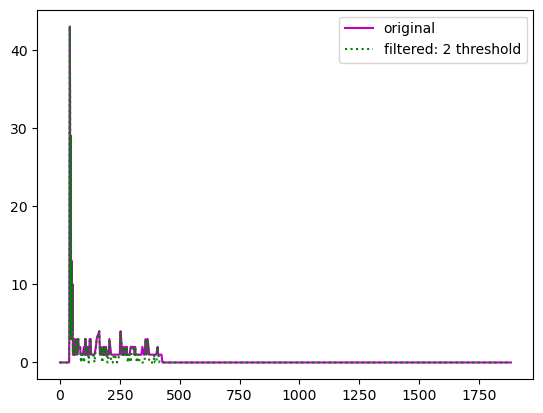

In [54]:
transcript = transcripts[0]
plot_threshold = transcript_to_read_number[transcript]['threshold']
zoom = None
# zoom = [550, 650]


try:
    print('reads_mapped ', transcript_to_read_number[transcript]['reads_mapped'])
    print('reads_left for ', threshold,' of max: ', transcript_to_read_number[transcript]['reads_left'])
    # read_starts_sampled=transcript_to_read_number[transcript]['read_starts_sampled']
    plot_dif(transcript, plot_threshold, zoom=zoom)
except KeyError as e:
    print(str(e), ' not found in transcripts')

In [55]:
for i in transcript_to_read_number[transcript]['read_starts']:
    if i > 620 and i < 660:
        print(i)


622
624
626
640
659
659


reads_mapped  116
reads_left for  2  of max:  46
plot_threshold  2
76.72 % of reads stayed


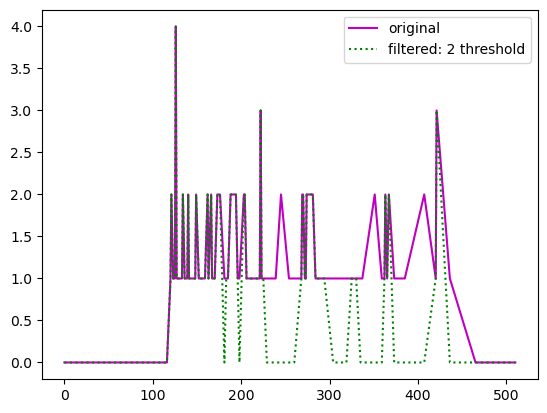

In [56]:
transcript = transcripts[1]
plot_threshold = transcript_to_read_number[transcript]['threshold']
zoom = None
# zoom = [0, 300]


try:
    print('reads_mapped ', transcript_to_read_number[transcript]['reads_mapped'])
    print('reads_left for ', threshold,' of max: ', transcript_to_read_number[transcript]['reads_left'])
    plot_dif(transcript, plot_threshold, zoom=zoom)
except KeyError as e:
    print(str(e), ' not found in transcripts')

reads_mapped  145
reads_left for  2  of max:  41
plot_threshold  2
89.66 % of reads stayed


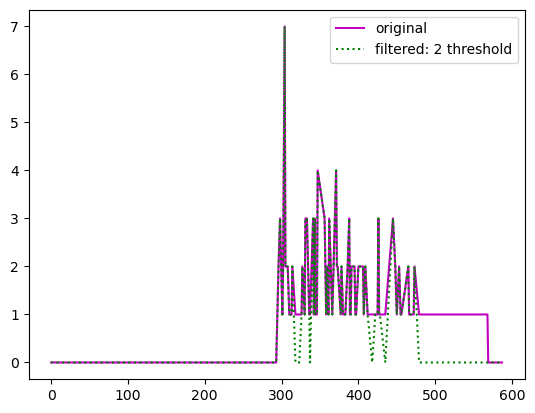

In [57]:
transcript = transcripts[2]
plot_threshold = transcript_to_read_number[transcript]['threshold']
zoom = None
# zoom = [0, 200]

try:
    print('reads_mapped ', transcript_to_read_number[transcript]['reads_mapped'])
    print('reads_left for ', threshold,' of max: ', transcript_to_read_number[transcript]['reads_left'])
    plot_dif(transcript, plot_threshold, zoom=zoom)
except KeyError as e:
    print(str(e), ' not found in transcripts')

In [ ]:
transcript = transcripts[3]
plot_threshold = transcript_to_read_number[transcript]['threshold']
zoom = None
zoom = [0, 900]

try:
    print('reads_mapped ', transcript_to_read_number[transcript]['reads_mapped'])
    print('reads_left for ', threshold,' of max: ', transcript_to_read_number[transcript]['reads_left'])
    plot_dif(transcript, plot_threshold, zoom=zoom)
except KeyError as e:
    print(str(e), ' not found in transcripts')

In [ ]:
for i in transcript_to_read_number[transcript]['read_starts']:
    if i > 820 and i < 860:
        print(i)


In [ ]:
transcript = transcripts[4]
plot_threshold = transcript_to_read_number[transcript]['threshold']
zoom = None
# zoom = [0, 200]

try:
    print('reads_mapped ', transcript_to_read_number[transcript]['reads_mapped'])
    print('reads_left for ', plot_threshold,' of max: ', transcript_to_read_number[transcript]['reads_left'])
    plot_dif(transcript, plot_threshold, zoom=zoom)
except KeyError as e:
    print(str(e), ' not found in transcripts')

In [ ]:
exit the run

In [ ]:
####
#######
#######
#######
#######
#######
#######
#######
#######
###